# Loan Approval Prediction Project

This report contains the Loan Approval Prediction Project included in my data science portfolio. The project is a part of the online hackathon organized by Analytics Vidhya. Evaluation of the hackathon depends on the accuracy of the model constructed, i.e., the percentage of correctly predicted loan approvals.

Based on my analysis, I constructed four models: Logistic Regression, Decision Tree, Random Forest, and XGBoost. The scores on the leaderboards for the same, are given below:

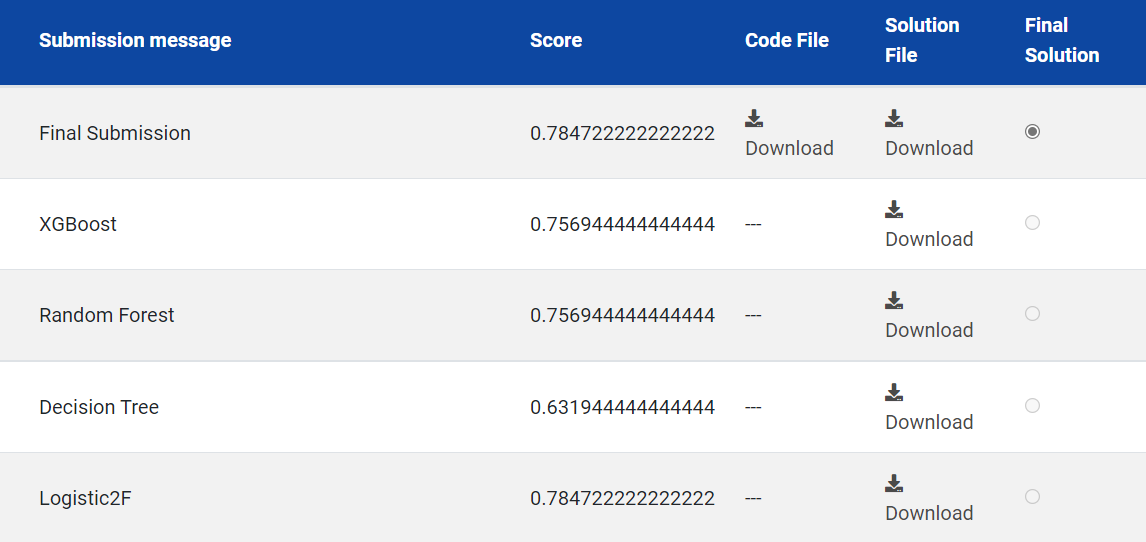

---

# Problem Statement

Dream Housing Finance (DHF) company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customers first apply for a home loan, after which DHF validates the customer's eligibility for the same. DHF wishes to automate the loan eligibility process (real-time) based on customer details provided while filling the online application form. A few examples of details collected are as follows:

-  Gender
    
- Marital Status
    
- Education

- Number of Dependents

- Income

- Loan Amount

- Credit History, and others.

---

# Why Is It Necessary?

A bank's profit or loss depends mainly on loans, i.e., whether the customers are paying back the loan or defaulting. Automating loan prediction allows a bank to reduce its non-performing assets. It also saves a lot of manpower, improves the speed of customer service, and increases savings in operational costs.

Loan Prediction represents a widespread problem faced by every retail bank while lending. Automating loan prediction saves a lot of manpower and improves the speed of customer service.

---

# Process Of Analysis

The problem described above pertains to classification, i.e., given the information about the applicants, we have to predict whether they should be approved for a loan or not. 

Hence, we start with exploratory data analysis, then data preprocessing, and finally, we test different models for classification, such as logistic regression and decision trees.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Hypothesis Generation

Here, we list out some of the possible factors that may determine the loan approval.

* Applicant Income: Applicants with higher income should have more chances of loan approval.
    
* Loan Amount: If the loan amount is less, then the chances of approval should increase.
    
* Loan Amount Term: If the loan is taken for a shorter period and less, there should be higher chances for approval.
    
* Credit History: If the applicant's credit history meets guidelines, they have a higher chance of getting their loan request approved.

Another factor that may affect loan approval (but not listed in the dataset) is the monthly installment.  If the installment amount is low, the chances for loan approval increase.

Some of these hypotheses may seem intuitive, while others may not. Thus, based on the dataset, we will try to validate them.

---

# Data Collection

The dataset for this project has been provided on the Analytics Vidhya [Hackathon Page](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About). The dataset has already been divided into training and testing data. The training dataset contains 13 columns and 614 rows, while the testing dataset contains 12 columns (excluding the outcome variable) and 367 rows. The following table contains a summary of the variables in the dataset.

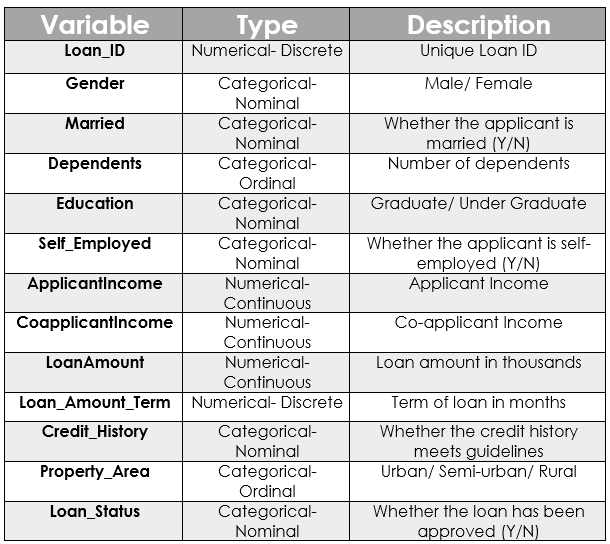

---

# Exploratory Data Analysis

Now, using python we shall explore the data to gain a better understanding of the variables and the target outcome. We present our findings using various visualization techniques.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the training dataset
train = pd.read_csv('train_ctrUa4K.csv')
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Loading the testing dataset
test = pd.read_csv('test_lAUu6dG.csv')
print(test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Notice the column Loan_Status is missing from the test data.**

We can also calculate the train-test split as follows:

In [4]:
round(train.shape[0]/(train.shape[0] + test.shape[0]), 2), round(test.shape[0]/(train.shape[0] + test.shape[0]), 2)

(0.63, 0.37)

In [5]:
#Features of both datasets
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

The features in our test data are similar to that of the training data with the exception of the outcome variable (Loan_Status).

In [6]:
#Observe the data types of variables
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Creating copies of the original data as a fail-safe
train_original = train.copy()
test_original = test.copy()

## Univariate Analysis

Here, we analyze each variable individually using frequency tables or countplots for categorical variables and histograms or boxplots for numerical variables.

### Dependent Variable- Loan_Status

In [8]:
#Frequency table for loan status, to get the count of each category in the variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#Obtaining the percentage for the same value counts
round(train['Loan_Status'].value_counts(normalize = True), 2)

Y    0.69
N    0.31
Name: Loan_Status, dtype: float64

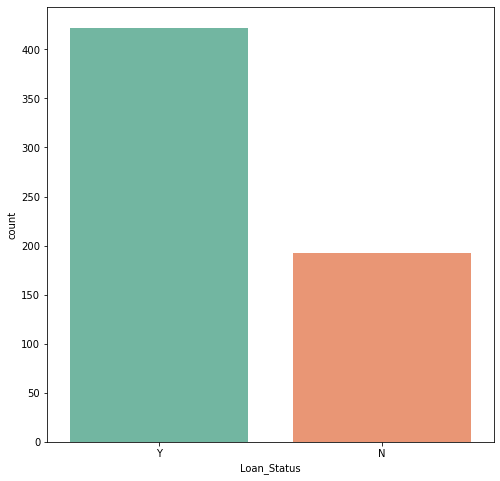

In [10]:
#We can also visualize the count for each category using a countplot
plt.figure(figsize=(8,8))
sns.countplot(x = 'Loan_Status', data = train, palette= "Set2")

Thus, roughly 69% of the applicants get their loans approved, while approximately 31% do not get approvals. Thus, the dataset does not seem to suffer from an imbalanced class.

### Independent Variables

First we take a look at the categorical variables from the dataset, namely: 

* **Binary:** Gender, Married, Self_Employed, Credit_History, Education.

* **Multi-Class:** Dependents, Property_Area

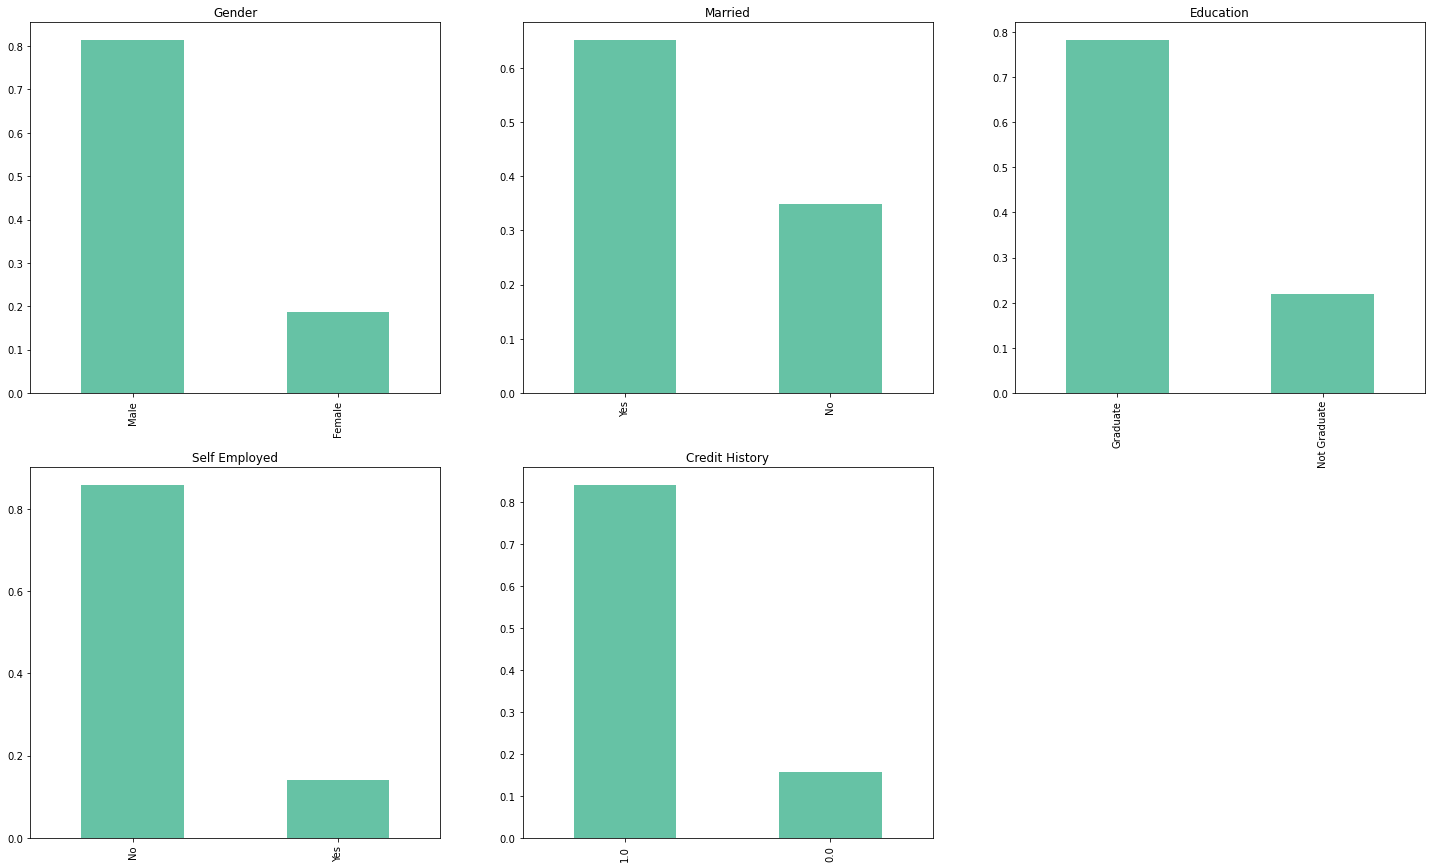

In [11]:
sns.set_palette('Set2', color_codes= True)

plt.subplot(231)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (25, 15), title = 'Gender')

plt.subplot(232)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

plt.subplot(233)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

plt.subplot(234)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')

plt.subplot(235)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')

plt.show()

**From the above charts we can make the following inferences:**

* Roughly 80% of the applicants are male.

* Roughly 2/3rds of the applicants are married.

* Around 80% of the applicants have a Graduate Level of Education

* Around 85% of the applicants are not self-employed

* Once again, around 85% of the applicants of credit history that meets the specified guidelines.


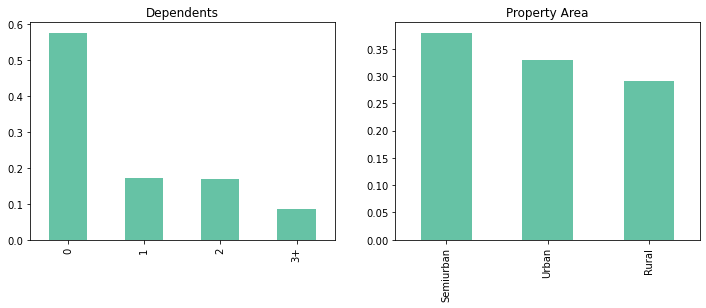

In [12]:
sns.set_palette('Set2', color_codes= True)

plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (12, 4), title = 'Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize = (12, 4), title = 'Property Area')

plt.show()

**From the above plots we note that:**

* Over half the applicants do not have dependents.

* A majority of the applicants come from semi-urban areas.

**Next, we analyze the numerical variables, namely:**
ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

#### Applicant Income

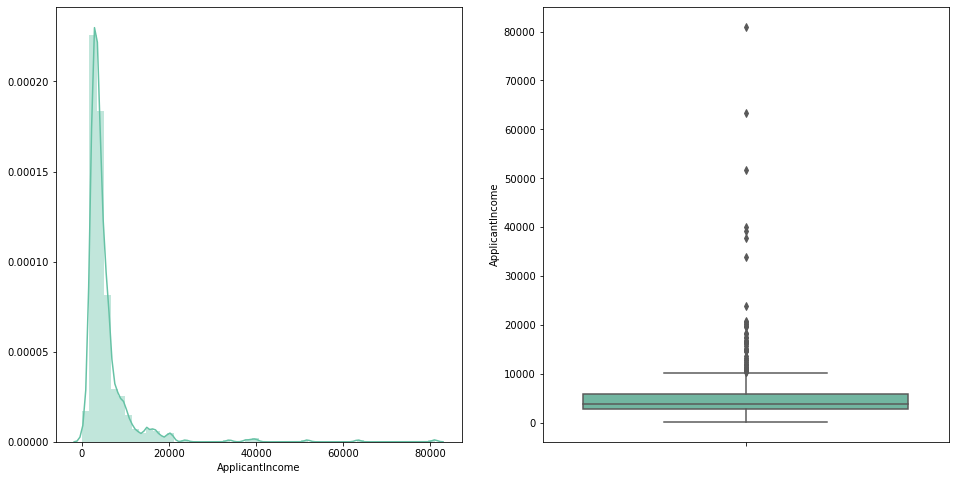

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
sns.boxplot(y = train['ApplicantIncome'])

plt.show()

We can see that the data for the Applicant Income variable is left skewed, meaning it is not normally distributed. Thus, one of our objectives should be to normalize the data as classification techniques work better on normalized data.

The boxplot confirms the presence of many outliers. Such an observation could be attributed to the income disparity within society, or that we are also looking at people from different education levels. We can confirm this by comparing the income distribution for different education backgrounds:

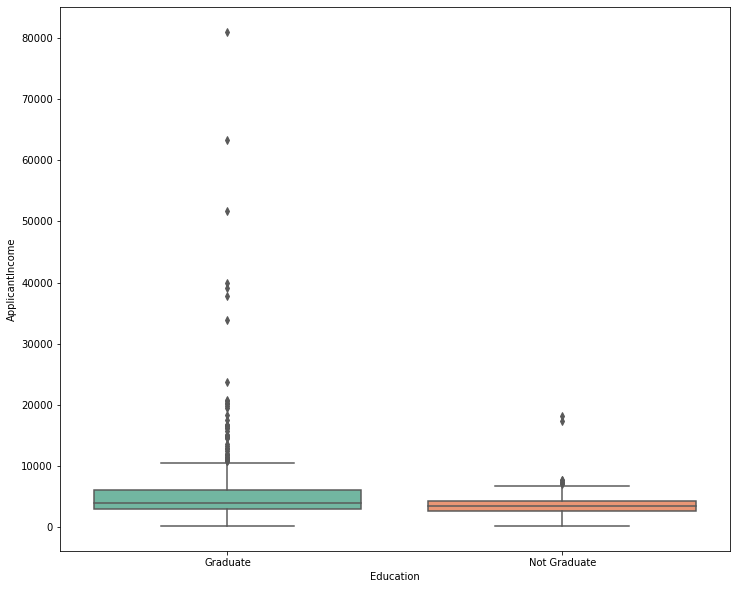

In [14]:
plt.figure(figsize=(12, 10))
sns.boxplot(x = train['Education'], y = train['ApplicantIncome'])

Here, we can see that there are a higher number of graduates with very high incomes, which are represented through the outliers.

#### Co-Applicant Income

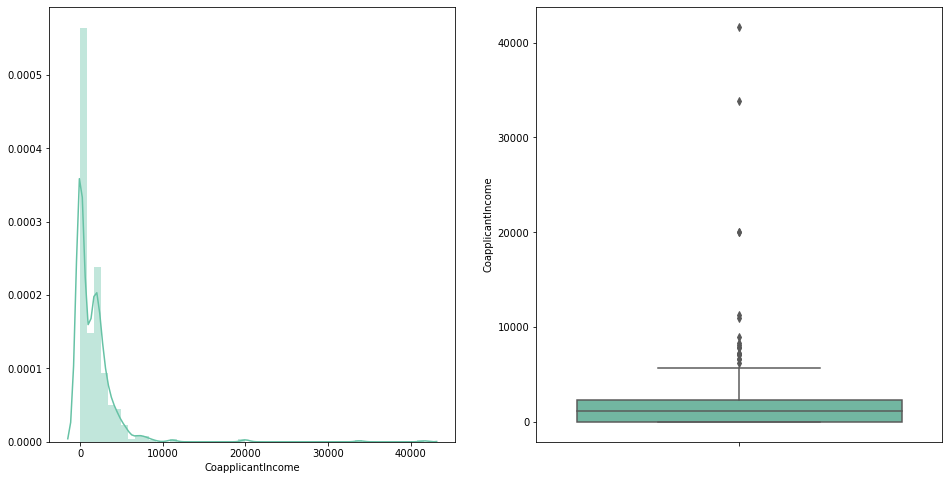

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
sns.boxplot(y = train['CoapplicantIncome'])

plt.show()

Co-applicant Income shares similar characteristics to that of Applicant Income. Most of the co-applicant income ranges between 0-5000. A lot of outliers exist for this attribute as well, and it is also not normally distributed.

#### Loan Amount

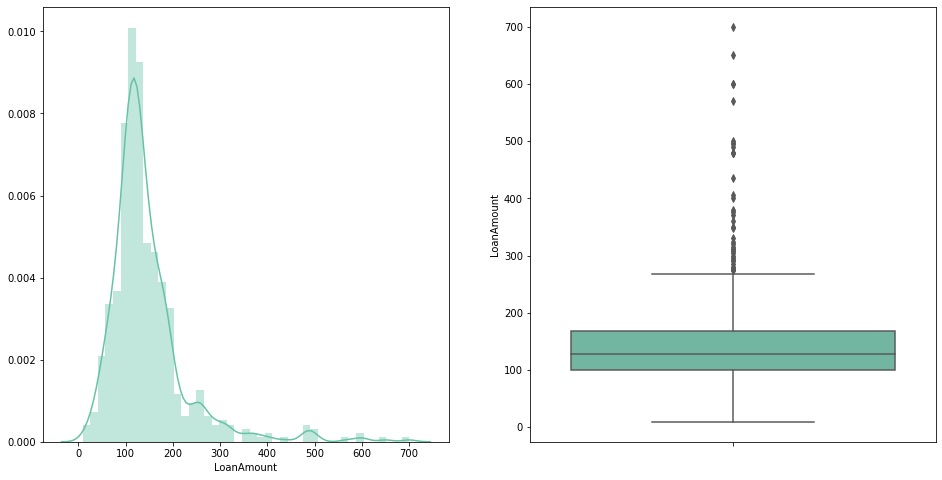

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
sns.boxplot(y = train['LoanAmount'])

plt.show()

Once again, the data here is right-skewed (to a lesser extent to that of Applicant and Co-Applicant income). There are also a large number of outliers for Loan Amount. 

#### Loan Amount Term

Since Loan_Amount_Term is a discrete variable, we will use a frequency table and barplots to visualize it.

In [17]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

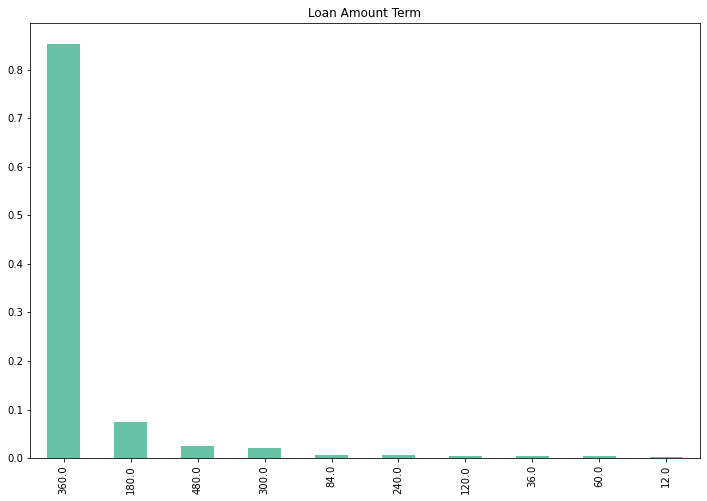

In [18]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(figsize = (12, 8), title = 'Loan Amount Term')

We can infer that around 85% of the loans are taken for a period of 360 months (30 years). Short term loans, in comparison, are scarce.

## Bivariate Analysis

Univariate analysis allows us to look at every variable individually, thus the next logical step would be to explore them again with respect to the target variable, i.e., bivariate analysis. Bivariate analysis will help us test out the hypotheses we generated earlier.

### Categorical Variables Vs Target Variable

Here, a stacked bar plot will give us the proportion of approved an unapproved loans, with respect to a certain categorical variables.

#### Gender

In [19]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


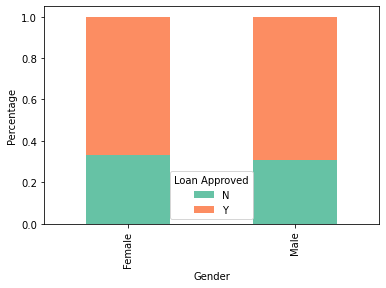

In [20]:
Gender.div(Gender.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

We observe that the proportion of approved and unapproved loans for both males and females is more or less the same.

#### Married

In [21]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


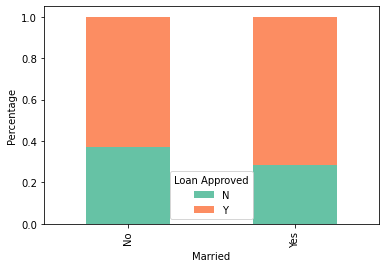

In [22]:
Married.div(Married.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Married')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

There is a higher proportion of approved loans among married applicants.

#### Education

In [23]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


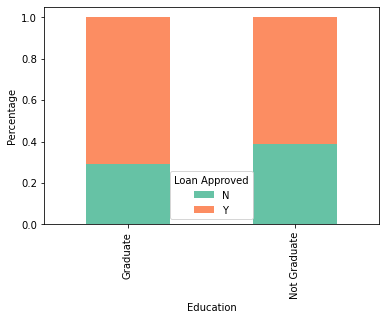

In [24]:
Education.div(Education.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Education')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

We find that Graduates have a higher proportion of approved loans, with around 70% approvals.

#### Self Employed

In [25]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


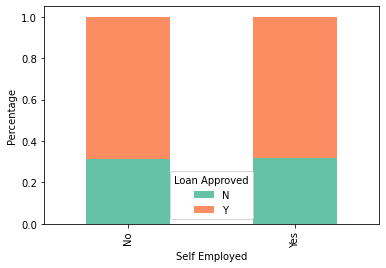

In [26]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Self Employed')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

We can clearly observe that the number of approved loans does not change depending on whether the applicant is self-employed or not.

#### Credit History

In [27]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


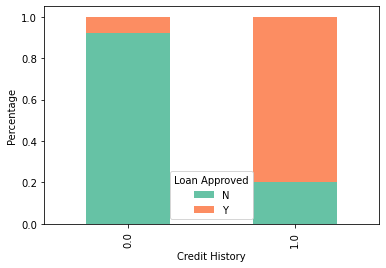

In [28]:
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Credit History')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

As we would expect, loan approvals are proportionally much higher for applicants with credit histories that meet the required guidelines.

#### Dependents

In [29]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


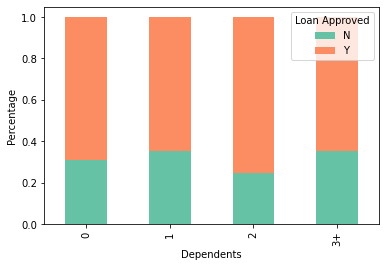

In [30]:
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Dependents')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

The proportion of loans being approved for applicants with 1 or 3+ applicants is fairly similar.

#### Property Area

In [31]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


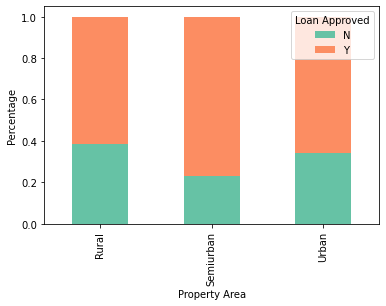

In [32]:
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Property Area')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

We can see that the proportion of loans being approved in semi-urban areas is higher compared to that of rural and urban.

### Numerical Variables vs Target Variable

#### Applicant Income and Co-Applicant Income

For both the applicant and co-applicant income, we will attempt to find the mean income of people for which the loan has been approved and not approved respectively.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


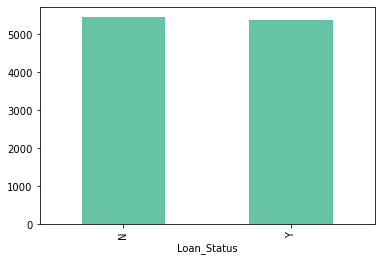

In [33]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

There is no significant difference in the mean incomes of applicants who have had their loans approved and those whose loan applications have been rejected. 

We can dig deeper by dividing the Applicant Income into bins to check whether any variability in proportions exist among different income levels.

In [34]:
condition = [(train['ApplicantIncome'] <= 2000), 
            (train['ApplicantIncome'] > 2000) & (train['ApplicantIncome'] <= 4000), 
            (train['ApplicantIncome'] > 4000) & (train['ApplicantIncome'] <= 6000),
            (train['ApplicantIncome'] > 6000)]

values = ['Low', 'Average', 'High', 'Very High']
train['Income_bins'] = np.select(condition, values)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [35]:
Income_bins = pd.crosstab(train['Income_bins'], train['Loan_Status'])
Income_bins

Loan_Status,N,Y
Income_bins,,
Average,85,208
High,45,98
Low,16,25
Very High,46,91


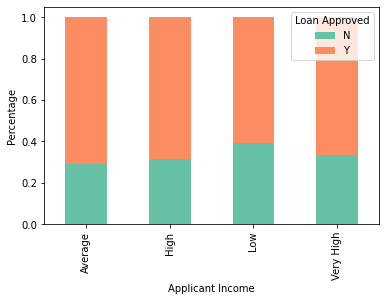

In [36]:
Income_bins.div(Income_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Applicant Income')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

The proportion of unapproved loans for applicants with low income is higher as opposed to other categories. However, there is not much distinction between the other categories, whereas we would expect that applicants with very high income would have higher chances of getting their loan applications approved.

We conduct a similar analysis for Co-Applicant income.

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64


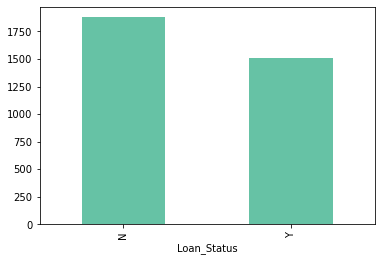

In [37]:
print(train.groupby('Loan_Status')['CoapplicantIncome'].mean())

train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

In [38]:
condition2 = [(train['CoapplicantIncome'] <= 1000), 
            (train['CoapplicantIncome'] > 1000) & (train['CoapplicantIncome'] <= 3000), 
            (train['CoapplicantIncome'] > 3000)]

values2 = ['Low', 'Average', 'High']
train['CoApplicant_Income_bins'] = np.select(condition2, values2)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,CoApplicant_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,Low
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,Low


In [39]:
CoApplicant_Income_bins = pd.crosstab(train['CoApplicant_Income_bins'], train['Loan_Status'])
CoApplicant_Income_bins

Loan_Status,N,Y
CoApplicant_Income_bins,,
Average,61,161
High,32,65
Low,99,196


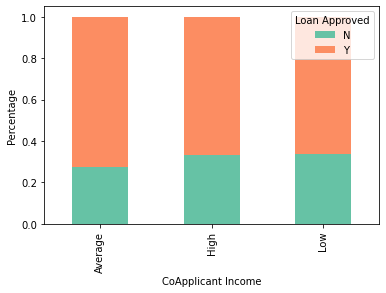

In [40]:
CoApplicant_Income_bins.div(CoApplicant_Income_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('CoApplicant Income')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

Here, we observe that there is not much distinction in the proportion of loan approvals among applicants with High or Low co-applicant income. However, this could be due to the fact that many applicants do not have a co-applicant.

Thus, to account for this, we can create a new variable 'Total Income' which combines both the applicant and the co-applicant's income. We can then check the affect of this new variable on Loan_Status.

In [41]:
#Create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [42]:
condition3 = [(train['Total_Income'] <= 2000), 
            (train['Total_Income'] > 2000) & (train['Total_Income'] <= 4000), 
            (train['Total_Income'] > 4000) & (train['Total_Income'] <= 6000),
            (train['Total_Income'] > 6000)]

values3 = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bins'] = np.select(condition3, values3)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,CoApplicant_Income_bins,Total_Income,Total_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,Low,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,Low,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,Low,6000.0,High


In [43]:
Total_Income_bins = pd.crosstab(train['Total_Income_bins'], train['Loan_Status'])
Total_Income_bins

Loan_Status,N,Y
Total_Income_bins,,
Average,41,96
High,65,159
Low,5,1
Very High,81,166


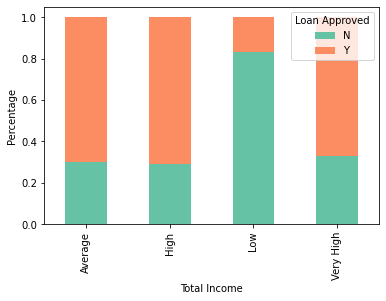

In [44]:
Total_Income_bins.div(Total_Income_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

This graph paints a picture that is consistent with our original hypothesis, as the proportion of unapproved loans is very high for applicants with low income.

#### Loan Amount

In [45]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [46]:
condition4 = [(train['LoanAmount'] <= 100), 
            (train['LoanAmount'] > 100) & (train['LoanAmount'] <= 200), 
            (train['LoanAmount'] > 200)]

values4 = ['Low', 'Average', 'High']
train['LoanAmount_bins'] = np.select(condition4, values4)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,CoApplicant_Income_bins,Total_Income,Total_Income_bins,LoanAmount_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,Low,5849.0,High,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,Low,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,Low,6000.0,High,Average


In [47]:
LoanAmount_bins = pd.crosstab(train['LoanAmount_bins'], train['Loan_Status'])
LoanAmount_bins

Loan_Status,N,Y
LoanAmount_bins,,
0,11,11
Average,103,255
High,31,49
Low,47,107


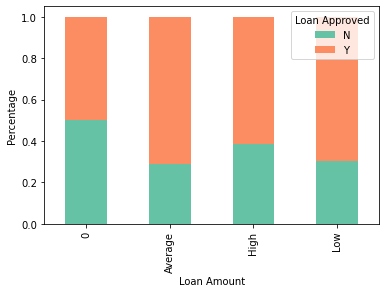

In [48]:
LoanAmount_bins.div(LoanAmount_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.legend(title = 'Loan Approved')
plt.show()

It can be seen that the proportion of approved loans is higher for the Low and Average loan amounts as compared to that of High Loan Amount. This supports our original hypothesis that the chances of loan approval will increase when the loan amount is less.

Now, we can drop the bins we created for exploration.

In [49]:
train.drop(['Income_bins', 'CoApplicant_Income_bins', 'Total_Income_bins', 'LoanAmount_bins', 'Total_Income'], axis = 1, inplace = True)

In [50]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Finally, we can analyze the correlation between all of the numerical variables. We will use corr() to compute the pairwise correlation, ignoring all of the NA/ null values. We will also visualize this correlation using a heatmap. Variables with darker colors in a heatmap signify higher correlations.

We will also convert the target variable into 0 and 1, where 0 denotes N and 1 denotes Y.

In [51]:
train['Loan_Status'].replace('N', 0, inplace= True)
train['Loan_Status'].replace('Y', 1, inplace= True)

In [52]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [53]:
#The correlation matrix for all numerical variables
matrix = train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


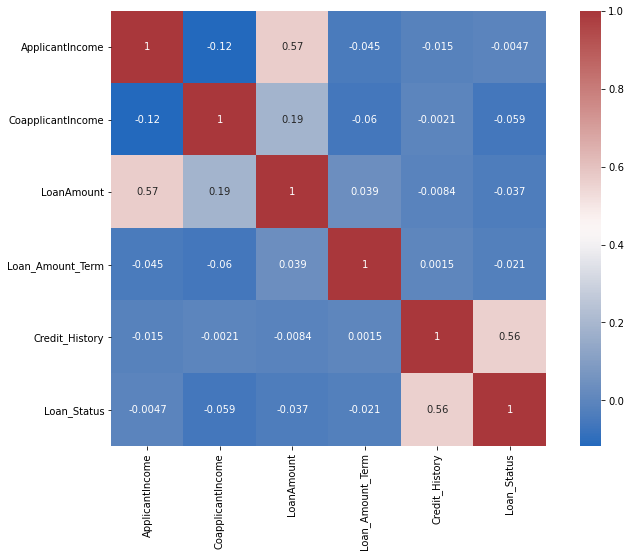

In [54]:
#Heatmap
fig, axes = plt.subplots(figsize = (12, 8))
sns.heatmap(matrix, vmax=1, square = True, cmap = 'vlag', annot = True)

Here, we can see that the following variables are correlated:

* Applicant Income - LoanAmount, with a correlation coefficient of 0.57

* Credit_History - Loan_Status, with a correlation coefficient of 0.56

---

# Data Pre-Processing

It refers to the process of transforming raw data into an understandable format. The need for this step arises due to the uncertainty with which data is available to us in the real world; it is often incomplete, inconsistent, lacking in certain behaviors or trends, and is likely to be full of many errors.

## Missing Values

In [55]:
#Checking for missing values
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now, we can deal with the missing values using the following methods:

* Numerical Variables: Fill values with mean or median.

* Categorical Variables: Fill values using mode.

If any attribute in our dataset had contained a large majority of missing values (for example, 80%), we would have dropped it. 

In [56]:
#Using mode to fill missing values
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

#We can also fill the values with mode for Loan Amount Term (as 30 months is the most commonly occuring value by a large margin)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

For the Loan Amount Variable, we can use the mean or median to fill in the existing values. In this case, we prefer to use the median because as we saw earlier, Loan Amount has a lot of many outliers, so using the mean may lead to some biased results.

In [57]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [58]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We now follow the same method for replacing the missing values in the test data. 

In [59]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [60]:
#Using mode to fill missing values
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

#We can also fill the values with mode for Loan Amount Term (as 30 months is the most commonly occuring value by a large margin)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [61]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outliers

We saw during the univariate analysis that Loan Amount contains a lot of outliers. The presence of such outliers affects the distribution of data, as it significantly affects the mean and standard deviation. In case of Loan Amount, we see that the presence of outliers has led to the variable's data being right skewed. 

We can deal with this skewness using a simple log transformation, which will reduce the larger values, thus giving us a distribution close to normal.

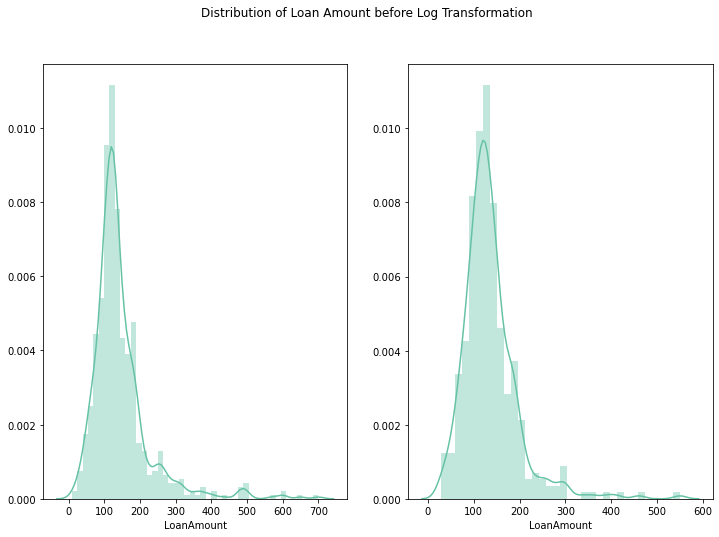

In [62]:
#Before log transformation

fig, axes = plt.subplots(1,2 , figsize = (12, 8))
plt.suptitle('Distribution of Loan Amount before Log Transformation')

sns.distplot(train['LoanAmount'], ax = axes[0])
sns.distplot(test['LoanAmount'], ax = axes[1])
plt.show()

In [63]:
#Removing skewness in LoanAmount using a log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(train['LoanAmount'])

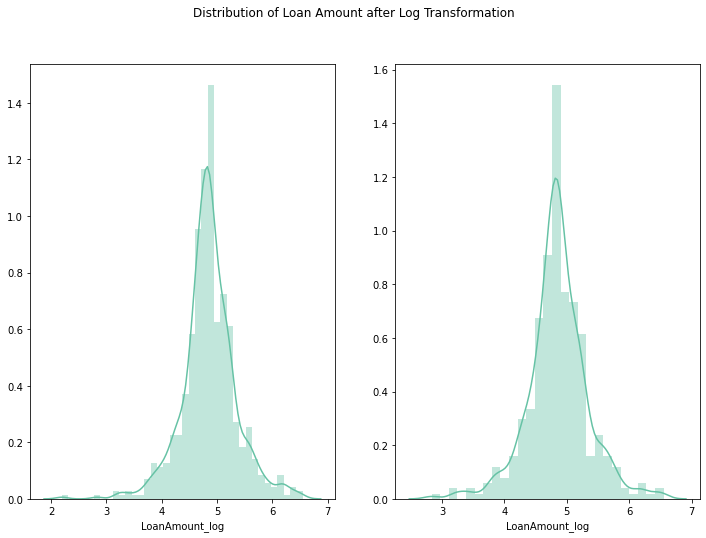

In [64]:
#After log transformation

fig, axes = plt.subplots(1,2 , figsize = (12, 8))
plt.suptitle('Distribution of Loan Amount after Log Transformation')

sns.distplot(train['LoanAmount_log'], ax = axes[0])
sns.distplot(test['LoanAmount_log'], ax = axes[1])
plt.show()

The distribution looks much closer to normal and the effect of extreme values has significantly subsided.

---

# Model Evaluation

Since this is a classification problem, we can use the following metrics for evaluation:

**Accuracy** 

We measure this using a confusion matrix which reports the following:

* True Positive: Targets that are true (Y) and we have predicted as true.

* True Negative: Targets that are false (N) and we have predicted as false.

* False Positive: Targets that are false (N) but we have predicted as true.

* False Negative: Targets that are true (Y) but we have predicted as false.

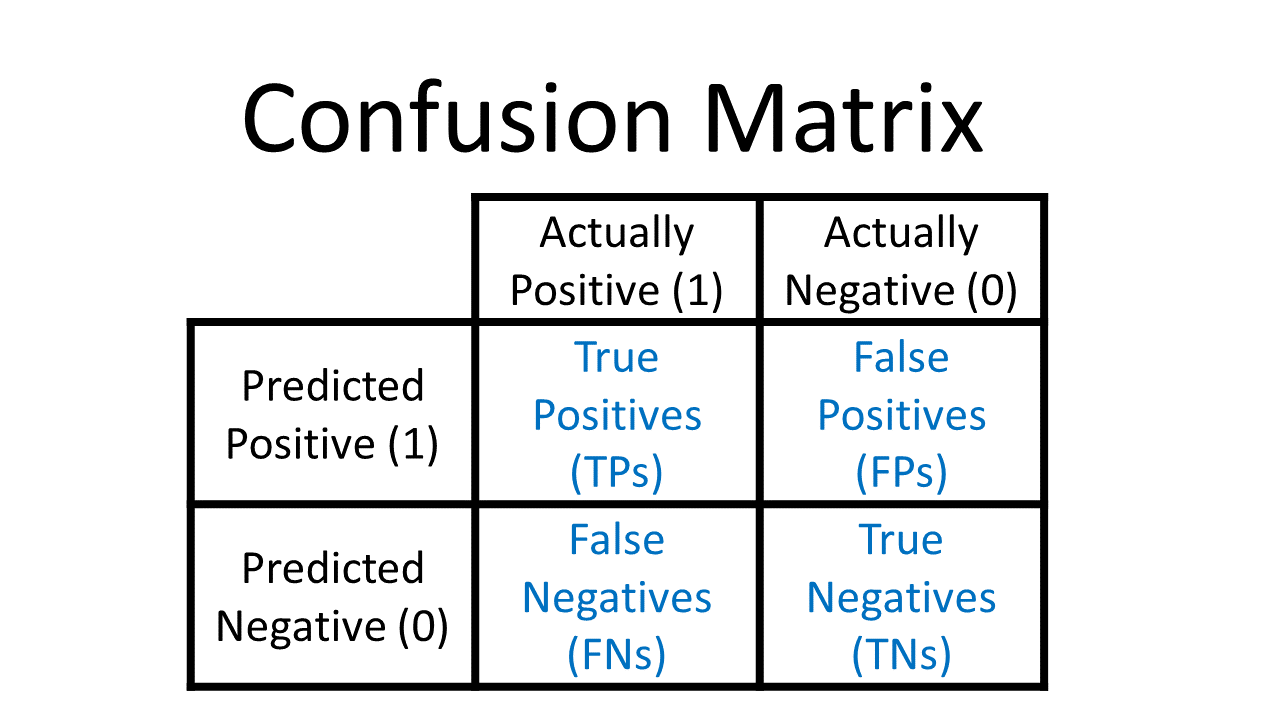

Using these values, we can predict the accuracy via the following formula:

_Accuracy = (TP + TN) / (TP + TN + FP + FN)_

**Precision**

It measures the correctness achieved in true prediction, i.e., the number of observations actually true out of all observations labeled true.

_Precision = TP / (TP + FP)_

**Recall (Sensitivity)**

It measures how many observations are predicted correctly. 

_Recall = TP / (TP + FN)_


**Specificity**

It measures how many observations marked false, are actually labeled correctly.

_Specificity = TN / (TN + FP)_

**Receiver Operating Characteristic (ROC)**

The ROC summarizes the model's performance by evaluating the trade offs between the Sensitivity and the False Positive Rate (1-Specificity). The area under the curve, also known as the concordance index, helps us measure the predictive power of a model, i.e., more the area under the curve, higher the predictive power.

The area measures the ability of the model to correctly classify true positives and true negatives.

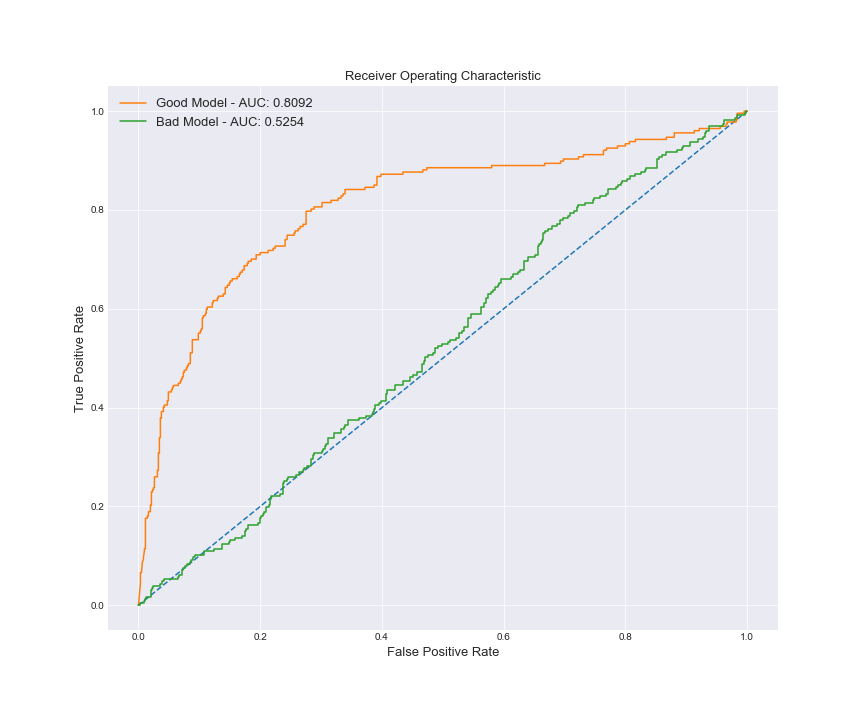

---

# Building Models

## Logistic Regression

Our first model will include the unchanged (except log transformation) dataset, used to predict the target variable. For the nature of this problem statement, we will start with Logistic Regression. 

**Logistic Regression** is a classification algorithm used to predict binary outcomes (1/0, Yes/ No, True/ False) given a set of independent variables. 

* It estimates the Logit function which is the log of odds in favor of an event.

* The Logit Function creates a S-Shaped curve with the probability estimate.

We can drop the Loan_ID variable from both the training and testing data as it will not have any effect on the loan status.

In [65]:
train.drop('Loan_ID', axis = 1, inplace= True)
test.drop('Loan_ID', axis = 1, inplace= True)

To create our Logistic Regression Model, we will use the popular Scikit-Learn Library (sklearn). Sklearn requires the target variable to be in a separate dataset, so we can create two datasets X and Y, one with the Loan_Status variable and one without.

In [66]:
#Independent Variables
X = train.drop('Loan_Status', axis = 1)

#Dependent Variable
Y = train['Loan_Status']

Now, we can create dummy variables for each of the categorical variables. Converting categorical variables into Dummy Variables assigns them values such as 0 and 1, making them easier to quantify and compare. 

We will use the pandas get_dummies function to accomplish this task.

In [67]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [68]:
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 21))

In [69]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


After getting our two new dataframes, we will then divide the training dataset into two  parts: training and validation sets. This technique, known as Cross Validation, involves reserving a particular sample of a dataset on which we do not train the model. Later, we test the model before finalizing it.

There are many methods for Cross Validation, however we will focus on using the **k-fold cross validation** approach.

* Under K-Fold Cross Validation, the data is stratified so as to ensure that each fold is a good representative of the whole.

* Such an approach generally helps in dealing with bias and variance.

* It also allows us to iterate on the training and testing process multiple times, which helps in validating the model effectiveness properly.

* For each k-fold in our dataset, we build our model on k-1 folds, then we test our model to check the effectiveness of the kth fold.

* We do this for each of the k-folds, and the average of the k recorded errors is called the cross-validation error and serves as the performance metric for our model.

In [70]:
#Import package
from sklearn.model_selection import StratifiedKFold

We choose to create 5 folds in our training dataset. Having too few folds can lead to a more biased model, while having too many folds can lead to higher variability. 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [72]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X, Y):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = Y[train_index], Y[test_index]
    
    logmodel = LogisticRegression(random_state = 101)
    logmodel.fit(xtr, ytr)
    pred_values = logmodel.predict(xvl)
    score = accuracy_score(yvl, pred_values)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
Accuracy Score 0.8048780487804879

2 of kfold 5
Accuracy Score 0.8130081300813008

3 of kfold 5
Accuracy Score 0.7723577235772358

4 of kfold 5
Accuracy Score 0.8130081300813008

5 of kfold 5
Accuracy Score 0.8278688524590164

Mean Validation Accuracy:  0.8062241769958683


In [73]:
#Making predictions on the test data

pred_test_values = logmodel.predict(test)

In [74]:
pred_test_values[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [75]:
#Importing the submission file

submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [76]:
submission['Loan_Status'] = pred_test_values
submission['Loan_ID'] = test_original['Loan_ID']

Since we need the Loan Status in the form of Y and N, we can replace the current values.

In [77]:
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)

In [78]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [79]:
#Convert to csv
submission.to_csv('logistic.csv', index = False)

I received a score of 0.7777777777777778 on the Leaderboard for this submission. 

## Feature Engineering

Based on some domain knowledge, we can add a few new features to our dataset that may affect the target variable and may lead to a better accuracy when predicting the loan status using our model. We can create three new features based:

* **Total Income-** Here, we combine the Applicant Income and the CoApplicant Income. If the total income is high, then the chances of loan approval increase.

* **Equated Monthly Installment-** People who have a higher EMI may find it difficult to pay off their loans, thus decreasing the chances of loan approval. We use a fairly simple formula for calculating the EMI, i.e., Loan Amount/ Loan Amount Term.

In [80]:
#Creating Total Income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

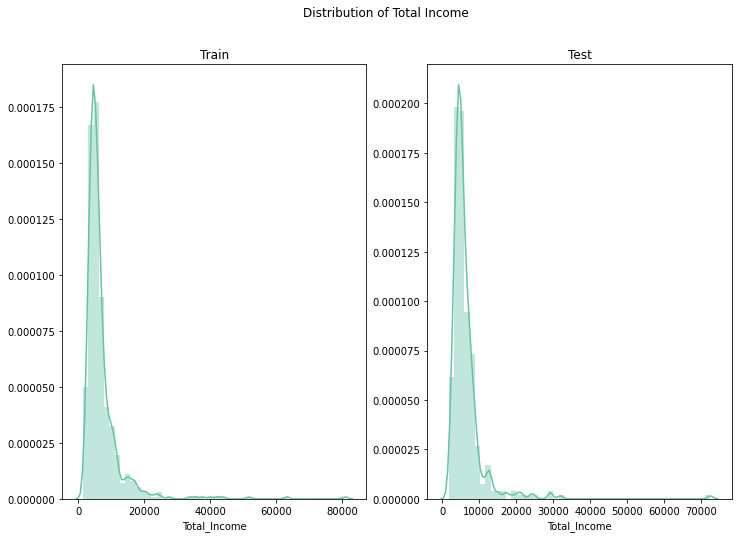

In [81]:
#Checking distribution of Total Income
fig, axes = plt.subplots(1, 2, figsize = (12, 8))
plt.suptitle('Distribution of Total Income')

sns.distplot(train['Total_Income'], ax = axes[0])
axes[0].set_title("Train")
sns.distplot(test['Total_Income'], ax = axes[1])
axes[1].set_title("Test")
plt.show()

We can see that total income is not normally distributed, i.e., it is skewed to the right. We can normalize this using a log transformation.

In [82]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

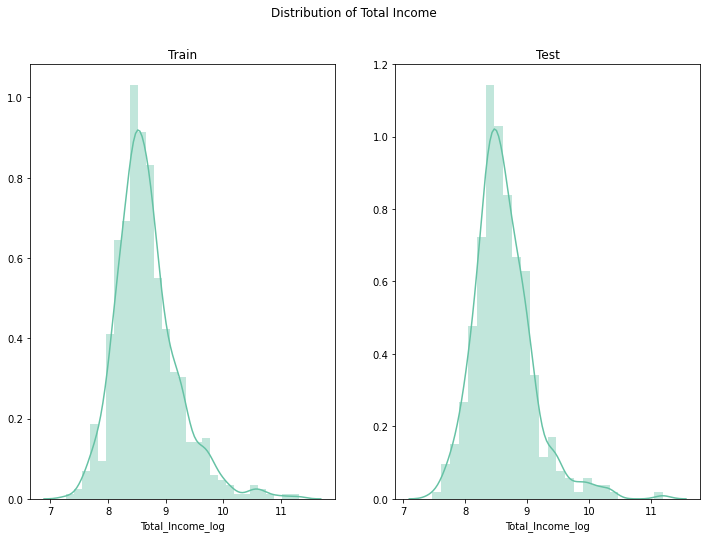

In [83]:
#Checking distributions again
#Checking distribution of Total Income
fig, axes = plt.subplots(1, 2, figsize = (12, 8))
plt.suptitle('Distribution of Total Income')

sns.distplot(train['Total_Income_log'], ax = axes[0])
axes[0].set_title("Train")
sns.distplot(test['Total_Income_log'], ax = axes[1])
axes[1].set_title("Test")
plt.show()

In [84]:
#Create EMI

train['EMI'] = train['LoanAmount']/ train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/ test['Loan_Amount_Term']

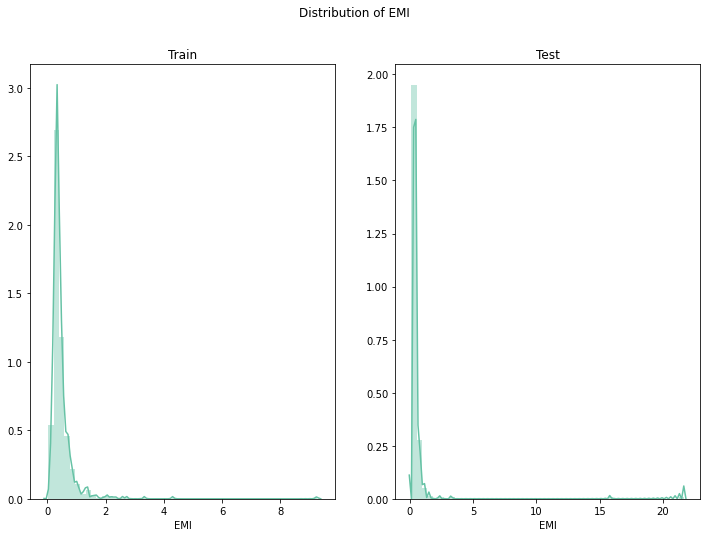

In [85]:
#Checking distribution of EMI
fig, axes = plt.subplots(1, 2, figsize = (12, 8))
plt.suptitle('Distribution of EMI')

sns.distplot(train['EMI'], ax = axes[0])
axes[0].set_title("Train")
sns.distplot(test['EMI'], ax = axes[1])
axes[1].set_title("Test")
plt.show()

In [86]:
#We drop the old variables for Income
train.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount', 'Total_Income'], axis = 1, inplace= True)
test.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount', 'Total_Income'], axis = 1, inplace= True)

In [87]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI
0,1.0,1,4.852030,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,8.674026,0.355556
1,1.0,0,4.852030,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,8.714568,0.355556
2,1.0,1,4.189655,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,8.006368,0.183333
3,1.0,1,4.787492,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,8.505323,0.333333
4,1.0,1,4.948760,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,8.699515,0.391667


**Now, we can create a new Logistic Model using our new dataset.**

In [88]:
X = train.drop('Loan_Status', axis = 1)
Y = train['Loan_Status']

We will use a Standard Scalar Transformation to normalize the independent variables.

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X, Y):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = Y[train_index], Y[test_index]
    
    logmodel = LogisticRegression(random_state = 101)
    logmodel.fit(xtr, ytr)
    pred_values = logmodel.predict(xvl)
    score = accuracy_score(yvl, pred_values)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
Accuracy Score 0.7886178861788617

2 of kfold 5
Accuracy Score 0.8130081300813008

3 of kfold 5
Accuracy Score 0.7804878048780488

4 of kfold 5
Accuracy Score 0.8130081300813008

5 of kfold 5
Accuracy Score 0.8360655737704918

Mean Validation Accuracy:  0.8062375049980007


In [91]:
#Making predictions on the test data

pred_test_values = logmodel.predict(test)

In [93]:
submission['Loan_Status'] = pred_test_values
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [94]:
#Convert to csv
submission.to_csv('logistic2.csv', index = False)

I received a score of 0.7847222222222222 on the Leaderboard. Thus, we can say that feature engineering helped improve the accuracy of the model.

## Decision Tree

The next model that I will attempt to use is the Decision Tree. A decision tree consists of 3 types of components:

* **Nodes-** Decision over a value of a certain attribute

* **Edges-** An edge is actually one of the answers from a node("yes", "no") and build the connection to the next nodes.

* **Leaf nodes-** Exit points for the outcome of the decision tree 

So predicting a value from decision tree would mean start from the top(the root node) and asking questions specific to each node. Then depending on the node answer, we choose the correct branch and continue with that until we arrive to a leaf node, thus finding a decision.

In [95]:
#Import library
from sklearn import tree

We fit the Decision Tree with 5 folds of cross-validation.

In [96]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X, Y):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = Y[train_index], Y[test_index]
    
    DecTree = tree.DecisionTreeClassifier(random_state= 101)
    DecTree.fit(xtr, ytr)
    pred_values = DecTree.predict(xvl)
    score = accuracy_score(yvl, pred_values)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
Accuracy Score 0.7479674796747967

2 of kfold 5
Accuracy Score 0.6910569105691057

3 of kfold 5
Accuracy Score 0.6585365853658537

4 of kfold 5
Accuracy Score 0.7560975609756098

5 of kfold 5
Accuracy Score 0.7295081967213115

Mean Validation Accuracy:  0.7166333466613354


The Mean Validation Accuracy here, is lower than that of Logistic Regression. Lets see how it performs on the Test dataset.

In [97]:
pred_test_values = DecTree.predict(test)

In [98]:
submission['Loan_Status'] = pred_test_values
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [99]:
#Convert to csv
submission.to_csv('DecisionTree.csv', index = False)

The score on the Leaderboard for Decision Tree is at 0.6319444444444444, which is much lower than that of Logistic Regression.

## Random Forest

Random Forest is a supervised machine learning algorithm. The "forest" it builds, is an ensemble of decision trees, merged together to get an accurate and stable prediction.

When using the sklearn Random Forest Classifier, we find the following parameters:

* **n_estimators-** Usually, the bigger the forest the better it is, as it reduces the chance of overfitting. We will use the default value of 10.

* **max_depth-** Reduces the maximum depth and helps with overfittinng. We will limit this to 10 as well.

In [100]:
#Import Library
from sklearn.ensemble import RandomForestClassifier

In [101]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X, Y):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = Y[train_index], Y[test_index]
    
    RandFor = RandomForestClassifier(random_state=101, max_depth=10, n_estimators = 10)
    RandFor.fit(xtr, ytr)
    pred_values = RandFor.predict(xvl)
    score = accuracy_score(yvl, pred_values)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
Accuracy Score 0.7804878048780488

2 of kfold 5
Accuracy Score 0.7804878048780488

3 of kfold 5
Accuracy Score 0.7560975609756098

4 of kfold 5
Accuracy Score 0.7967479674796748

5 of kfold 5
Accuracy Score 0.8442622950819673

Mean Validation Accuracy:  0.79161668665867


Here, the mean validation accuracy is 79%. 

In [102]:
pred_test_values = RandFor.predict(test)

In [103]:
submission['Loan_Status'] = pred_test_values
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [104]:
#Convert to csv
submission.to_csv('RandomForest.csv', index = False)

For this model, I have received a Leaderboard score of 0.7569444444444444.

## XGBoost

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle Competitions. It is an implementation of gradient boosted decision trees designed for speed and performance. The name XGBoost refers to the engineering goal to push the limit of computations resources for boosted tree algorithms.

XGBoost only works with numerical variables, and we have already converted all of our categorical variables into Dummy Variables. The following are the parameters we must use:

* **n_estimator-** This specifies the number of trees for the model.
* **max_depth-** We can specify maximum depth of a tree using this parameter.

In [105]:
#Import Library
from xgboost import XGBClassifier

In [106]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X, Y):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = Y[train_index], Y[test_index]
    
    XGmod = XGBClassifier(random_state=101, n_estimators = 50, max_depth = 4)
    XGmod.fit(xtr, ytr)
    pred_values = XGmod.predict(xvl)
    score = accuracy_score(yvl, pred_values)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
[16:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 0.7560975609756098

2 of kfold 5
[16:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 0.8048780487804879

3 of kfold 5
[16:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

The mean validation accuracy here is at 78%.

In [107]:
pred_test_values = XGmod.predict(test)

In [108]:
submission['Loan_Status'] = pred_test_values
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [109]:
#Convert to csv
submission.to_csv('XGmod.csv', index = False)

The final score for this model is 0.7569444444444444.

---

# Conclusion

During this project, I have tried and tested 4 different algorithms, and based on the accuracy achieved on the Public Leaderboard, **Logistic Regression** has performed the best, with a score of 0.7847, while **Decision Tree** performed the worst at 0.6319. Both **Random Forest** and **XGBoost** achieved the same score of 0.7569. We found that the performance of Logistic Regression improved after the use of Feature Engineering.

In summary, this project is helpful to me in understanding how a machine learning competition is approached and what are the steps one should go through to build a robust model. 

---

## References

* https://towardsdatascience.com/data-types-in-statistics-347e152e8bee

* https://machinelearning-blog.com/2018/04/23/logistic-regression-101/